## All model comparison

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from hate_speech_detection import model_gpt2, train_bert
from hate_speech_detection.models import models
from hate_speech_detection.util import confusionMatrixAndAccuracyReport



g:\MTechClasses\DL-Ops\Project\hate-speech-detection


05/13/2023 01:36:24 - INFO - happytransformer.happy_transformer -   Using model: cpu


### Loading Test Data

In [2]:
import pandas as pd

test = pd.read_json(
    '../data/SBIC.v2.agg.tst.tiny.promted_prepared.jsonl', orient='records', lines=True)
test.head()

,prompt,completion
0,1 horrible cunt that Ross Barkley. 2 bad tackl...,1
1,Parents:\n\nIf YOU do not teach your children ...,1
2,"The kikes probably put the Leftist up to it , ...",1
3,"""Just when you think the Swans are dead and bu...",0
4,It is people like James O'Keefe and Project Ve...,0


In [3]:

predicted = {
    "raw_txt":[],
    "actual_class":[],
             }
for k in models.keys():
    predicted[f'pred_{k}']=[]

for row in test.values:
    predicted["raw_txt"].append(row[0][:-7])
    predicted["actual_class"].append(row[1]==1)
    for k in models.keys():
        predicted[f'pred_{k}'].append(models[k].predict(row[0])[0])

TextClassificationResult(label='HATE', score=0.7264271974563599)
prompt = Is it Hate speech ? reply in yes or no :
1 horrible cunt that Ross Barkley. 2 bad tackles and 1 shocking tackle. How the fuck is he still on the pitch!!

###



Yes, this is
prompt = 1 horrible cunt that Ross Barkley. 2 bad tackles and 1 shocking tackle. How the fuck is he still on the pitch!!

###



###


classification=1
TextClassificationResult(label='NON_HATE', score=0.5558055639266968)
prompt = Is it Hate speech ? reply in yes or no :
Parents:

If YOU do not teach your children the rich, vibrant, and yes, sometimes controversial, history of your own locale, your region, your State, and your Country, they will be taught the Leftist version...sterilized, false, misleading, twisted, and full of intentional Social Justice overtones

###



No
prompt = Parents:

If YOU do not teach your children the rich, vibrant, and yes, sometimes controversial, history of your own locale, your region, your State, and your Cou

In [4]:
predicted_df = pd.DataFrame(predicted)
predicted_df

,raw_txt,actual_class,pred_Bert,pred_GPT-3 Zero Shot,pred_GPT-3 FineTuned
0,1 horrible cunt that Ross Barkley. 2 bad tackl...,True,True,True,True
1,Parents:\n\nIf YOU do not teach your children ...,True,False,False,False
2,"The kikes probably put the Leftist up to it , ...",True,True,True,True
3,"""Just when you think the Swans are dead and bu...",False,False,False,False
4,It is people like James O'Keefe and Project Ve...,False,True,False,False
...,...,...,...,...,...
230,Not All Straight Men - I am frustrated. Unlike...,False,True,False,False
231,My dad was salty he failed no nut November My ...,False,False,False,False
232,There is no doubt in my mind that the #LegacyM...,True,True,True,True
233,F3701: Japanese Wooden Lacquer ware Drawer CHE...,False,False,False,False


In [5]:
predicted_df.to_csv('../data/predicted_SBIC.v2.agg.trn.tiny.csv',index=False)

**Model Bert**
              precision    recall  f1-score   support

       False       0.67      0.63      0.65       104
        True       0.72      0.76      0.74       131

    accuracy                           0.70       235
   macro avg       0.70      0.70      0.70       235
weighted avg       0.70      0.70      0.70       235

-----------------------------------------------------------
Accuracy: 70.213%
F1 Score: 70.104%

Classwise Accuracy Score: 
|     Hate |   Non-Hate |
|---------:|-----------:|
| 0.634615 |   0.755725 |

Confusion Matrix:
| True Label   |   Hate |   Non-Hate |
|:-------------|-------:|-----------:|
| Hate         |     66 |         38 |
| Non-Hate     |     32 |         99 |
-----------------------------------------------------------
**Model GPT-3 Zero Shot**
              precision    recall  f1-score   support

       False       0.53      0.92      0.68       104
        True       0.85      0.36      0.51       131

    accuracy                   

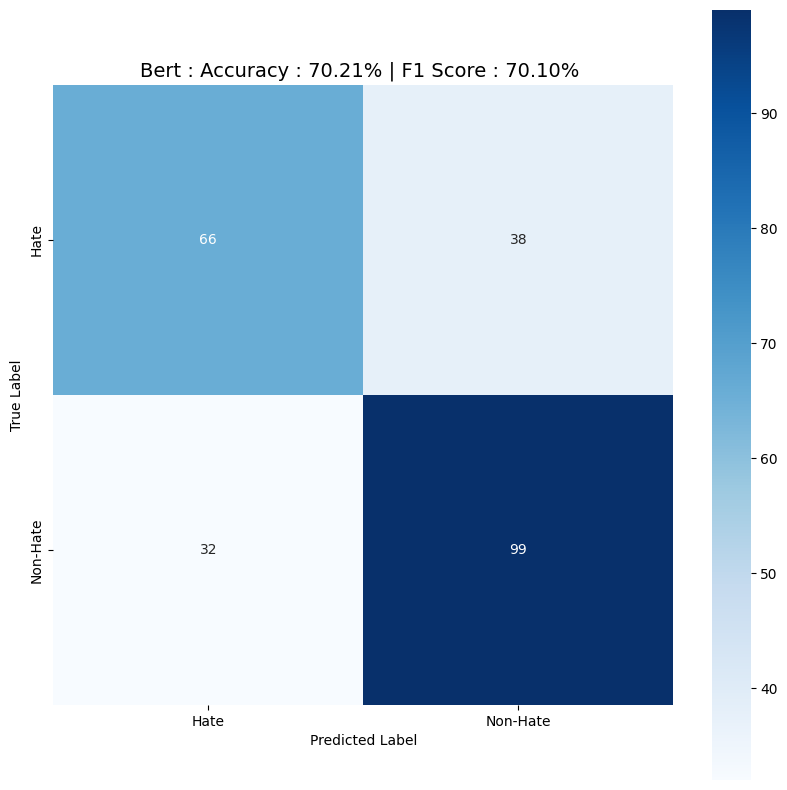

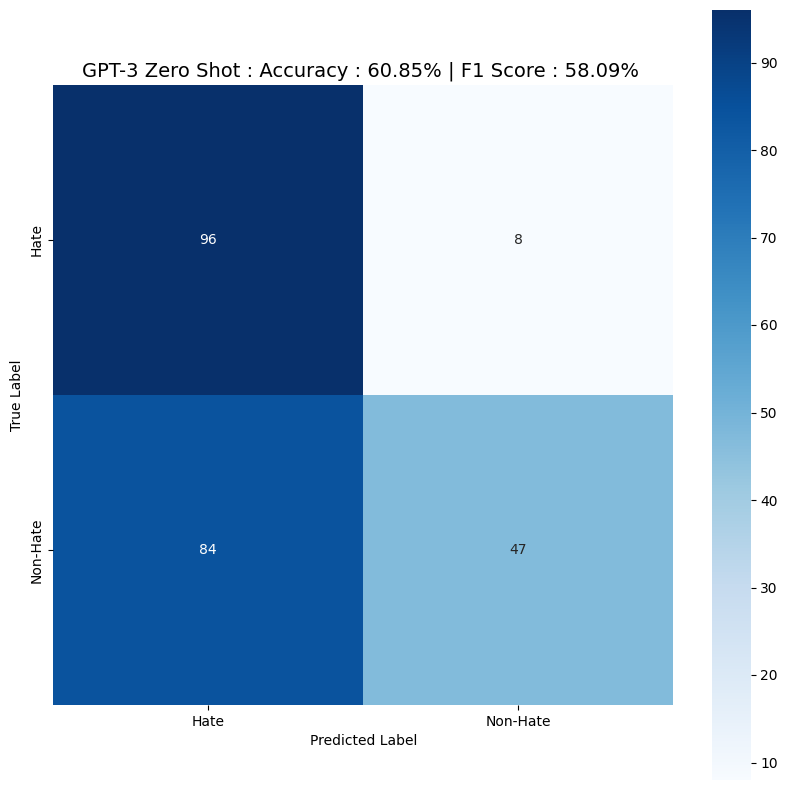

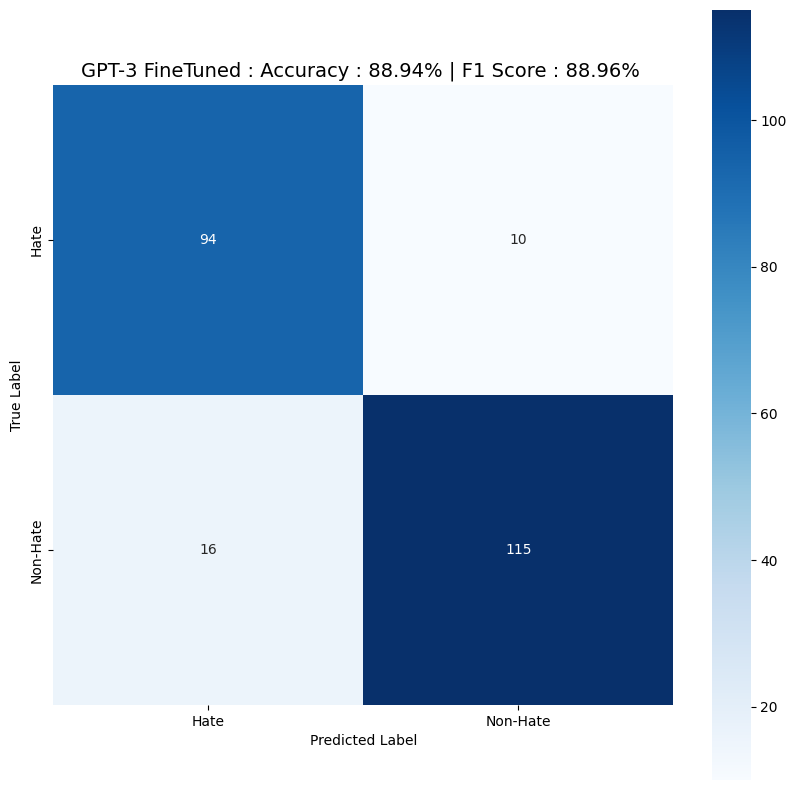

In [6]:
from sklearn import metrics

for k in models.keys():
    print(f'**Model {k}**')
    print(metrics.classification_report(predicted['actual_class'], predicted[f'pred_{k}']))
    print('-----------------------------------------------------------')
    confusionMatrixAndAccuracyReport(predicted['actual_class'], predicted[f'pred_{k}'], ['Hate','Non-Hate'], title=k)
    print('-----------------------------------------------------------')

In [8]:
from sklearn import metrics

perf_metrics = []

for k in models.keys():
    print(f'{k} Model')
    perf_metrics.append({
        "Model" :k,
        "Accuracy":metrics.accuracy_score(predicted['actual_class'], predicted[f'pred_{k}']),
        "F1 Score":metrics.f1_score(predicted['actual_class'], predicted[f'pred_{k}'],average='weighted'),
        "Precision":metrics.precision_score(predicted['actual_class'], predicted[f'pred_{k}']),
        "Recall":metrics.recall_score(predicted['actual_class'], predicted[f'pred_{k}']),
        "ROC AUC Score":metrics.roc_auc_score(predicted['actual_class'], predicted[f'pred_{k}'])
    })

Bert Model
GPT-3 Zero Shot Model
GPT-3 FineTuned Model


In [10]:
perf_metrics_df = pd.DataFrame(perf_metrics)
perf_metrics_df

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,Bert,0.702128,0.701038,0.722628,0.755725,0.695170
1,GPT-3 Zero Shot,0.608511,0.580911,0.854545,0.358779,0.640928
2,GPT-3 FineTuned,0.889362,0.889616,0.920000,0.877863,0.890854


In [12]:
perf_metrics_df.to_csv('../results/perf_metrics_models.csv',index=False)
print(perf_metrics_df.to_markdown(index=False))

| Model           |   Accuracy |   F1 Score |   Precision |   Recall |   ROC AUC Score |
|:----------------|-----------:|-----------:|------------:|---------:|----------------:|
| Bert            |   0.702128 |   0.701038 |    0.722628 | 0.755725 |        0.69517  |
| GPT-3 Zero Shot |   0.608511 |   0.580911 |    0.854545 | 0.358779 |        0.640928 |
| GPT-3 FineTuned |   0.889362 |   0.889616 |    0.92     | 0.877863 |        0.890854 |
